In [ ]:
# !pip install -q datasets # https://github.com/huggingface/datasets/issues/5111
!pip install -q datasets==2.5.0
!pip install -q matplotlib==3.5.0 # Need >=3.5.0 https://stackoverflow.com/questions/21910986/why-set-xticks-doesnt-set-the-labels-of-ticks
!git clone https://huggingface.co/datasets/bigscience/evaluation-results
!pip install -q -U matplotlib
# RESTART RUNTIME #

In [ ]:
from datasets.utils.logging import set_verbosity_error
set_verbosity_error()

In [ ]:
from datasets import load_dataset


bloom = load_dataset("evaluation-results", "bloom")
bloom_7b1 = load_dataset("evaluation-results", "bloom-7b1")
bloom_3b = load_dataset("evaluation-results", "bloom-3b")
bloom_1b7 = load_dataset("evaluation-results", "bloom-1b7")
bloom_1b1 = load_dataset("evaluation-results", "bloom-1b1")
bloom_560m = load_dataset("evaluation-results", "bloom-560m")

bloomz_mt = load_dataset("evaluation-results", "bloomz-mt")
bloomz_p3 = load_dataset("evaluation-results", "bloomz-p3")


bloomz = load_dataset("evaluation-results", "bloomz")
bloomz_7b1 = load_dataset("evaluation-results", "bloomz-7b1")
bloomz_3b = load_dataset("evaluation-results", "bloomz-3b")
bloomz_1b7 = load_dataset("evaluation-results", "bloomz-1b7")
bloomz_1b1 = load_dataset("evaluation-results", "bloomz-1b1")
bloomz_560m = load_dataset("evaluation-results", "bloomz-560m")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Sanity check that datasets works
out = bloom["test"].filter(lambda x: x["task_name"] == "xcopa_zh", load_from_cache_file=False)
out[0]

  0%|          | 0/4 [00:00<?, ?ba/s]

{'evaluation_framework': 'bigscience/bloomz',
 'checkpoint_type': 'transformers',
 'task_name': 'xcopa_zh',
 'prompt_name': 'cause_effect',
 'metric': 'accuracy',
 'score': 0.5,
 'fewshots': 0}

In [ ]:
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use("seaborn-pastel")

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Model BLOOM DS xcopa Rows 55
Model BLOOMZ-P3 DS xcopa Rows 55
Model BLOOMZ-MT DS xcopa Rows 55
Model BLOOMZ DS xcopa Rows 55
Model BLOOM DS xnli Rows 75
Model BLOOMZ-P3 DS xnli Rows 75
Model BLOOMZ-MT DS xnli Rows 75
Model BLOOMZ DS xnli Rows 75
Model BLOOM DS Muennighoff/xstory_cloze Rows 50
Model BLOOMZ-P3 DS Muennighoff/xstory_cloze Rows 50
Model BLOOMZ-MT DS Muennighoff/xstory_cloze Rows 50
Model BLOOMZ DS Muennighoff/xstory_cloze Rows 50
Model BLOOM DS Muennighoff/xwinograd Rows 30
Model BLOOMZ-P3 DS Muennighoff/xwinograd Rows 30
Model BLOOMZ-MT DS Muennighoff/xwinograd Rows 30
Model BLOOMZ DS Muennighoff/xwinograd Rows 30


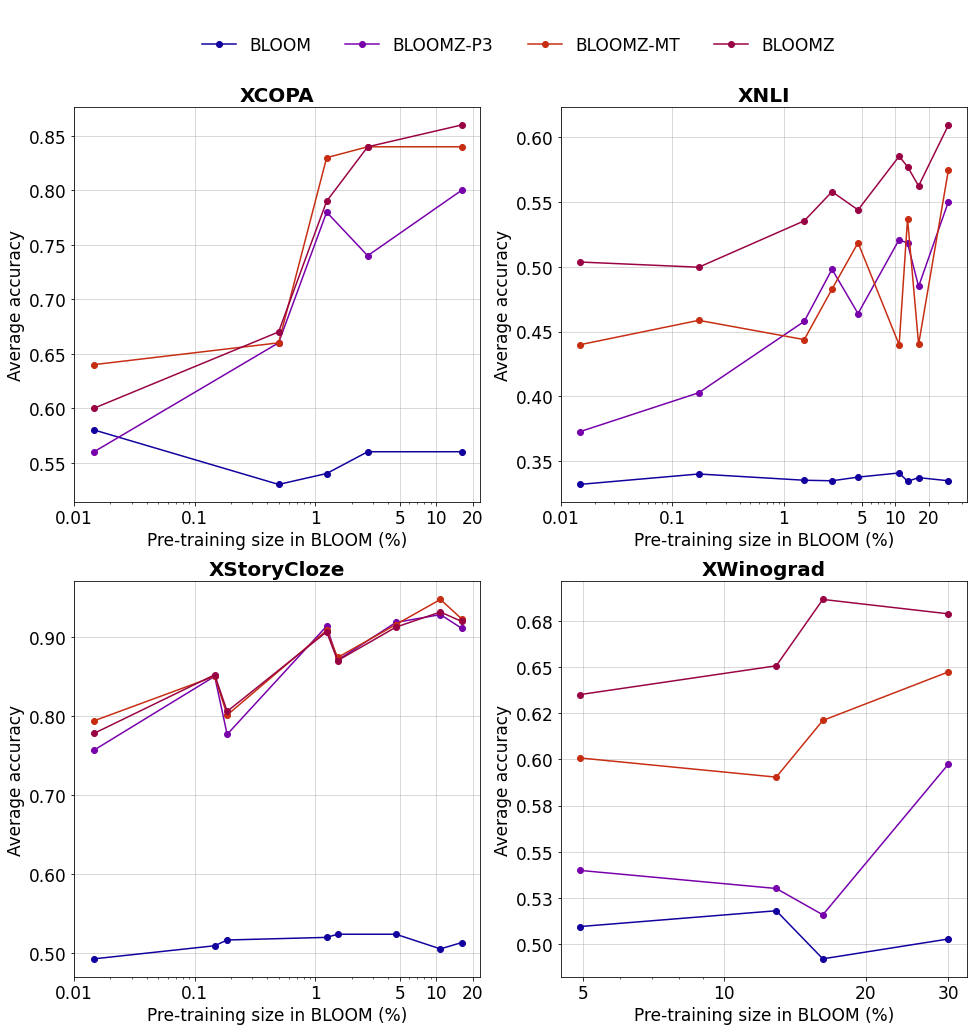

In [ ]:
from numpy.lib.function_base import disp
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

#import matplotlib.ticker
#matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x
#from matplotlib import rc
#rc('mathtext', default='regular') 

fig, axes = plt.subplots(figsize=(16, 16), facecolor='w', edgecolor='k', ncols=2, nrows=2, sharey=False)


lang_to_size = {'en': 39.24620201551399, 'es': 7.975198651942383, 'pt': 6.456139676780976, 'fr': 5.842189693709217, 'ar': 4.926446833778489, 'id': 4.851689563187335, 'zh': 4.8344327000030844, 'hi': 4.627771651928395, 'code': 4.561474288874834, 'vi': 3.266636568270527, 'ur': 2.020468594615555, 'te': 1.4039233411039775, 'ta': 0.9737488395012295, 'bn': 0.8770834418206934, 'mr': 0.7017341630783682, 'sw': 0.5907779255733736, 'gu': 0.5905588443024798, 'pa': 0.5511242155415916, 'ne': 0.41465343618019335, 'yo': 0.37157868784137704, 'ig': 0.3425588456506722, 'ny': 0.2866257119509339, 'zu': 0.2777613466824608, 'xh': 0.26823973760130615, 'sn': 0.26594781045964766, 'ts': 0.2635884736961758, 'rw': 0.26264473899078694, 'lg': 0.2485055708154087, 'tn': 0.2480842606790744, 'nso': 0.2419499850940474, 'rn': 0.20327371457856094, 'ml': 0.18436531565987868, 'kn': 0.17427072479330946, 'or': 0.17007447583542007, 'as': 0.16458059165762115, 'ln': 0.13303288864891064, 'wo': 0.12908942577282181, 'tum': 0.12221364434784647, 'ki': 0.12116879520973746, 'st': 0.12015765088253519, 'fon': 0.11909594933897283, 'ca': 0.11650067889915369, 'eu': 0.1138717036484278, 'ak': 0.11385485124297444, 'bm': 0.11275944488850533, 'tw': 0.11195052942674354}
lang_to_size_roots = {'en': 30.037738155300612, 'es': 10.845502021203275, 'pt': 4.9104099669270145, 'fr': 12.898440029620971, 'ar': 4.636473764592998, 'id': 1.2370754775903348, 'zh': 16.21463669713211, 'hi': 1.5250813563850147, 'code': 10.82084271967929, 'vi': 2.7073301570739647, 'ur': 0.17227413679285575, 'te': 0.18541008869429135, 'ta': 0.4948472944596122, 'bn': 1.1524969837995998, 'mr': 0.10997250478789186, 'sw': 0.014647606203670996, 'gu': 0.07432653967957878, 'pa': 0.09737566360763834, 'ne': 0.15802665821797454, 'yo': 0.005555713552984965, 'ig': 0.0008720162973641245, 'ny': 7.354725056500241e-05, 'zu': 0.00052720167892699, 'xh': 0.0008859869333364238, 'sn': 0.0004111938605139755, 'ts': 4.3830483370303235e-05, 'rw': 0.0025041078961852412, 'lg': 0.00028296228533810145, 'tn': 9.304548978549579e-05, 'nso': 0.00010929258753790842, 'rn': 0.00020270005165592083, 'ml': 0.2268577811914572, 'kn': 0.1299771264028207, 'or': 0.07167018280245462, 'as': 0.018056727727137064, 'ln': 0.00010224994456121394, 'wo': 0.00022341403902813146, 'tum': 1.0552010145025338e-05, 'ki': 2.2274366801498514e-05, 'st': 4.651865688693919e-05, 'fon': 0.00015351985522958422, 'ca': 1.102057816921949, 'eu': 0.14620634148352055, 'ak': 4.345389132004641e-05, 'bm': 2.4264606235520314e-05, 'tw': 7.835598418568325e-05}

sorted_langs_by_size = sorted(lang_to_size_roots.items(), key=lambda x:x[1])
sorted_langs_by_size = [lang for lang, _ in sorted_langs_by_size]


datasets = ["xcopa", "xnli", "Muennighoff/xstory_cloze", "Muennighoff/xwinograd"]

DS_TO_NAME = {
    "xstory_cloze": "XStoryCloze",
    "xwinograd": "XWinograd",
    "xnli": "XNLI",
    "xcopa": "XCOPA"
}

color_map = {
    'mT5 XXL': '#c7a012',
    'BLOOM-7.1B': '#5440ed', 
    'BLOOMZ-7.1B': '#fc68be', 
    'BLOOM': '#12009e', 
    'BLOOMZ-P3': '#7800ab', 
    'BLOOMZ': '#990344', 
    'BLOOMZ-MT': '#c72d12', 
    #'GPT-3 (175B)': '#7b241c', 
    #'T5+LM (11B)': '#2874a6 ', 
}

MODEL_TO_RES = {
    "BLOOM": bloom,
    "BLOOMZ-P3": bloomz_p3,
    "BLOOMZ-MT": bloomz_mt,
    "BLOOMZ": bloomz,
}

for ax, ds in zip(axes.flatten(), datasets):
    y_scores_models = []
    for name in MODEL_TO_RES:
        model_type = MODEL_TO_RES[name]
        y_scores_lang = {}
        ds_data = model_type['test'].filter(
            lambda x: x["task_name"].startswith(ds) and not(x["prompt_name"].endswith(("mt", "ht")))
        )
        
        print(f"Model {name} DS {ds} Rows {len(ds_data)}")
        # Iterate through langauges
        for task_name in set(ds_data["task_name"]):
            task_ds = ds_data.filter(lambda x: x["task_name"] == task_name)
            # assert len(task_ds) == 5, f"Expected 5 prompts, but got {len(task_ds)} for task {task_name}."
            score = np.median([x["score"] for x in task_ds])
            lang = task_name.split("_")[-1]
            y_scores_lang[lang] = score
        y_scores_models.append((name, y_scores_lang))

    # get common languages
    displayed_langs = []
    for lang in sorted_langs_by_size:
        appears_in_all = True
        for _, model_scores in y_scores_models:
            if lang not in model_scores:
                appears_in_all = False
        
        if appears_in_all:
            displayed_langs.append(lang)
    
    # build plot
    labels = [f"{lang}\n({round(lang_to_size_roots[lang], 1)})" for lang in displayed_langs]
    # x = np.arange(len(labels))  # the label locations
    x = [lang_to_size_roots[lang] for lang in displayed_langs]
    width = 0.2  # the width of the bars
    offset = width * 1.5

    for i, (name, model_scores) in enumerate(y_scores_models):
      y_scores = [model_scores[lang] for lang in displayed_langs]
      # ax.bar(x - offset + i * width, y_scores, width, label=name)
      ax.plot(x, y_scores,  marker="o", label=name, color=color_map[name])


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Average accuracy')
    ax.set_xlabel("Pre-training size in BLOOM (%)")
    #ax.set_xticks(x, labels)
    ax.set_title(DS_TO_NAME[ds.split("/")[-1]], fontweight="bold", fontsize=20)
    ax.grid(alpha=0.6)
    
    
    for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
      item.set_fontsize(17)
    ax.set_xscale('log')

    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter()) # Allow non-mathematical values
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f')) # Allow 2 digits after comma

    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.FormatStrFormatter('%g')) # Rmv trailing zeroes
    if ds == "Muennighoff/xwinograd":
      #ax.get_xaxis().set_major_locator(plt.MaxNLocator(1))
      
      #ax.set_xscale('log')
      ax.set_xticks([5, 10, 20, 30])
      
      #ax.get_xaxis().get_major_formatter().labelOnlyBase = False
      #ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
      # Remove exponential notation
      ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
      ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
      
    else:
      ax.set_xticks([0.01, 0.1, 1, 5, 10, 20])

# Create deduplicated Global Legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(
    by_label.values(), 
    by_label.keys(), 
    loc=(0.20, 0.94), # "upper center",
    ncol=len(by_label),
    frameon=False,
    fontsize=17
)
#plt.subplots_adjust(hspace=0.5)
plt.savefig('pretraining_sizes.pdf', dpi=300, bbox_inches='tight')

plt.show()


Model BLOOM DS xcopa Rows 55
Model BLOOMZ-P3 DS xcopa Rows 55
Model BLOOMZ-MT DS xcopa Rows 55
Model BLOOMZ DS xcopa Rows 55
Model BLOOM DS xnli Rows 75
Model BLOOMZ-P3 DS xnli Rows 75
Model BLOOMZ-MT DS xnli Rows 75
Model BLOOMZ DS xnli Rows 75
Model BLOOM DS Muennighoff/xstory_cloze Rows 50
Model BLOOMZ-P3 DS Muennighoff/xstory_cloze Rows 50
Model BLOOMZ-MT DS Muennighoff/xstory_cloze Rows 50
Model BLOOMZ DS Muennighoff/xstory_cloze Rows 50
Model BLOOM DS Muennighoff/xwinograd Rows 30
Model BLOOMZ-P3 DS Muennighoff/xwinograd Rows 30
Model BLOOMZ-MT DS Muennighoff/xwinograd Rows 30
Model BLOOMZ DS Muennighoff/xwinograd Rows 30


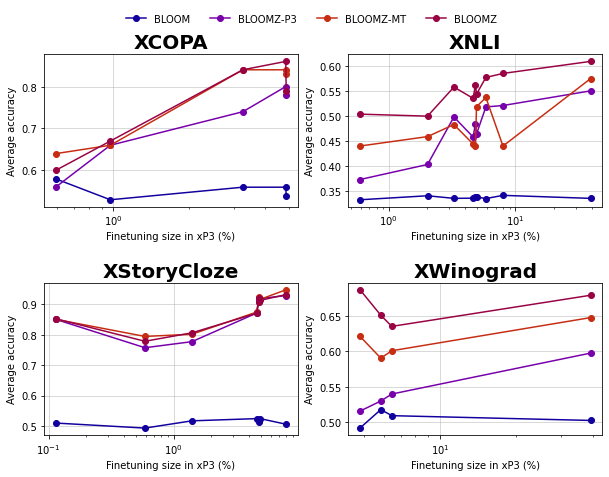

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(figsize=(10, 7), facecolor='w', edgecolor='k', ncols=2, nrows=2, sharey=False)


lang_to_size = {'en': 39.24620201551399, 'es': 7.975198651942383, 'pt': 6.456139676780976, 'fr': 5.842189693709217, 'ar': 4.926446833778489, 'id': 4.851689563187335, 'zh': 4.8344327000030844, 'hi': 4.627771651928395, 'code': 4.561474288874834, 'vi': 3.266636568270527, 'ur': 2.020468594615555, 'te': 1.4039233411039775, 'ta': 0.9737488395012295, 'bn': 0.8770834418206934, 'mr': 0.7017341630783682, 'sw': 0.5907779255733736, 'gu': 0.5905588443024798, 'pa': 0.5511242155415916, 'ne': 0.41465343618019335, 'yo': 0.37157868784137704, 'ig': 0.3425588456506722, 'ny': 0.2866257119509339, 'zu': 0.2777613466824608, 'xh': 0.26823973760130615, 'sn': 0.26594781045964766, 'ts': 0.2635884736961758, 'rw': 0.26264473899078694, 'lg': 0.2485055708154087, 'tn': 0.2480842606790744, 'nso': 0.2419499850940474, 'rn': 0.20327371457856094, 'ml': 0.18436531565987868, 'kn': 0.17427072479330946, 'or': 0.17007447583542007, 'as': 0.16458059165762115, 'ln': 0.13303288864891064, 'wo': 0.12908942577282181, 'tum': 0.12221364434784647, 'ki': 0.12116879520973746, 'st': 0.12015765088253519, 'fon': 0.11909594933897283, 'ca': 0.11650067889915369, 'eu': 0.1138717036484278, 'ak': 0.11385485124297444, 'bm': 0.11275944488850533, 'tw': 0.11195052942674354}
lang_to_size_roots = {'en': 30.037738155300612, 'es': 10.845502021203275, 'pt': 4.9104099669270145, 'fr': 12.898440029620971, 'ar': 4.636473764592998, 'id': 1.2370754775903348, 'zh': 16.21463669713211, 'hi': 1.5250813563850147, 'code': 10.82084271967929, 'vi': 2.7073301570739647, 'ur': 0.17227413679285575, 'te': 0.18541008869429135, 'ta': 0.4948472944596122, 'bn': 1.1524969837995998, 'mr': 0.10997250478789186, 'sw': 0.014647606203670996, 'gu': 0.07432653967957878, 'pa': 0.09737566360763834, 'ne': 0.15802665821797454, 'yo': 0.005555713552984965, 'ig': 0.0008720162973641245, 'ny': 7.354725056500241e-05, 'zu': 0.00052720167892699, 'xh': 0.0008859869333364238, 'sn': 0.0004111938605139755, 'ts': 4.3830483370303235e-05, 'rw': 0.0025041078961852412, 'lg': 0.00028296228533810145, 'tn': 9.304548978549579e-05, 'nso': 0.00010929258753790842, 'rn': 0.00020270005165592083, 'ml': 0.2268577811914572, 'kn': 0.1299771264028207, 'or': 0.07167018280245462, 'as': 0.018056727727137064, 'ln': 0.00010224994456121394, 'wo': 0.00022341403902813146, 'tum': 1.0552010145025338e-05, 'ki': 2.2274366801498514e-05, 'st': 4.651865688693919e-05, 'fon': 0.00015351985522958422, 'ca': 1.102057816921949, 'eu': 0.14620634148352055, 'ak': 4.345389132004641e-05, 'bm': 2.4264606235520314e-05, 'tw': 7.835598418568325e-05}

sorted_langs_by_size = sorted(lang_to_size.items(), key=lambda x:x[1])
sorted_langs_by_size = [lang for lang, _ in sorted_langs_by_size]

datasets = ["xcopa", "xnli", "Muennighoff/xstory_cloze", "Muennighoff/xwinograd"]

DS_TO_NAME = {
    "xstory_cloze": "XStoryCloze",
    "xwinograd": "XWinograd",
    "xnli": "XNLI",
    "xcopa": "XCOPA"
}

MODEL_TO_RES = {
    "BLOOM": bloom,
    "BLOOMZ-P3": bloomz_p3,
    "BLOOMZ-MT": bloomz_mt,
    "BLOOMZ": bloomz,
}

for ax, ds in zip(axes.flatten(), datasets):
    y_scores_models = []
    for name in MODEL_TO_RES:
        model_type = MODEL_TO_RES[name]
        y_scores_lang = {}
        ds_data = model_type['test'].filter(
            lambda x: x["task_name"].startswith(ds) and not(x["prompt_name"].endswith(("mt", "ht")))
        )
        
        print(f"Model {name} DS {ds} Rows {len(ds_data)}")
        # Iterate through langauges
        for task_name in set(ds_data["task_name"]):
            task_ds = ds_data.filter(lambda x: x["task_name"] == task_name)
            # assert len(task_ds) == 5, f"Expected 5 prompts, but got {len(task_ds)} for task {task_name}."
            score = np.median([x["score"] for x in task_ds])
            lang = task_name.split("_")[-1]
            y_scores_lang[lang] = score
        y_scores_models.append((name, y_scores_lang))

    # get common languages
    displayed_langs = []
    for lang in sorted_langs_by_size:
        appears_in_all = True
        for _, model_scores in y_scores_models:
            if lang not in model_scores:
                appears_in_all = False
        
        if appears_in_all:
            displayed_langs.append(lang)
    
    # build plot
    labels = [f"{lang}\n({round(lang_to_size[lang], 1)})" for lang in displayed_langs]
    x = [lang_to_size[lang] for lang in displayed_langs]
    width = 0.2  # the width of the bars
    offset = width * 1.5

    for i, (name, model_scores) in enumerate(y_scores_models):
      y_scores = [model_scores[lang] for lang in displayed_langs]
      # ax.bar(x - offset + i * width, y_scores, width, label=name)
      ax.plot(x, y_scores,  marker="o", label=name, color=color_map[name])


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Average accuracy')
    ax.set_xlabel("Finetuning size in xP3 (%)")
    ax.set_xticks(x, labels)
    ax.set_title(DS_TO_NAME[ds.split("/")[-1]], fontweight="bold", fontsize=20)
    ax.grid(alpha=0.6)
    
    ax.set_xscale('log')

# Create deduplicated Global Legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(
    by_label.values(), 
    by_label.keys(), 
    loc=(0.20, 0.94), # "upper center",
    ncol=len(by_label),
    frameon=False
)
plt.subplots_adjust(hspace=0.5)
plt.show()
plt.savefig('scale.png', dpi=300, bbox_inches='tight')